# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

In [1]:
import pandas as pd
import xlrd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['font.sans-serif']=['SimHei']
rcParams['axes.unicode_minus'] = False

In [2]:
data=pd.read_csv('tq_past_load.csv',encoding="gb18030")
# data=data.dropna(thresh=round(data.shape[1]*0.4))
# data=data.dropna(subset=['tqmc'])
# data.fillna(data.median(),inplace=True)
data=data.dropna()
#去除影响计算的空值行
data.head()

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tqlx,tqmc,bs,2017/06/01,2017/06/08,2017/06/15,2017/06/22,2017/06/29,2017/07/06,2017/07/13,...,2019/03/21,2019/03/28,2019/04/04,2019/04/11,2019/04/18,2019/04/25,2019/05/02,2019/05/09,2019/05/16,2019/05/23
14,1,保利悦都1#公变,1006307096,0.0,40.68,47.31,38.40,0.00,24.84,9.57,...,0.00,0.00,74.70,91.68,99.63,80.58,94.74,95.64,136.83,165.27
15,1,保利悦都2#公变,1006307362,0.0,27.39,29.94,31.86,0.00,0.00,30.72,...,94.44,90.15,86.16,89.40,99.18,91.74,146.85,89.19,172.89,172.62
16,1,保利悦都3#公变,1006305928,0.0,53.18,43.16,52.32,0.00,0.00,50.66,...,95.60,89.26,71.40,98.38,91.48,74.14,97.44,93.02,99.36,85.72
17,1,保利悦都4#公变,1006306186,0.0,23.36,23.18,27.88,0.00,0.00,30.06,...,73.62,55.52,47.56,88.96,95.72,72.18,97.16,86.42,85.20,94.22
18,1,保利悦都5#公变,1006306440,0.0,54.46,52.82,50.10,54.32,44.06,59.38,...,98.92,94.96,73.60,88.26,92.92,97.72,95.64,98.88,152.98,157.22


In [3]:
#删除含有零值的行
# droplist=[]
# for i in range(len(data.index)):
#     if (data.iloc[i].drop(['tqlx','tqmc','bs']).values==np.array(0)).any():
#         droplist.append(data.iloc[i].name)
# data=data.drop(labels=droplist)
# data.head()

In [4]:
#每一行的空值用每一行的平均值来填充
# for row in data.index:
#     data.loc[row].fillna(data.loc[row].drop(['tqlx','tqmc','bs']).mean(),inplace=True)
# data.head()

In [5]:
#tqlx和tqmc在时间序列分析中暂时用不到，删除
data_time_series=data.drop(columns=['tqlx','tqmc'])
data_time_series.head()

,bs,2017/06/01,2017/06/08,2017/06/15,2017/06/22,2017/06/29,2017/07/06,2017/07/13,2017/07/20,2017/07/27,...,2019/03/21,2019/03/28,2019/04/04,2019/04/11,2019/04/18,2019/04/25,2019/05/02,2019/05/09,2019/05/16,2019/05/23
14,1006307096,0.0,40.68,47.31,38.40,0.00,24.84,9.57,40.56,39.93,...,0.00,0.00,74.70,91.68,99.63,80.58,94.74,95.64,136.83,165.27
15,1006307362,0.0,27.39,29.94,31.86,0.00,0.00,30.72,35.97,36.45,...,94.44,90.15,86.16,89.40,99.18,91.74,146.85,89.19,172.89,172.62
16,1006305928,0.0,53.18,43.16,52.32,0.00,0.00,50.66,55.82,44.70,...,95.60,89.26,71.40,98.38,91.48,74.14,97.44,93.02,99.36,85.72
17,1006306186,0.0,23.36,23.18,27.88,0.00,0.00,30.06,32.04,28.32,...,73.62,55.52,47.56,88.96,95.72,72.18,97.16,86.42,85.20,94.22
18,1006306440,0.0,54.46,52.82,50.10,54.32,44.06,59.38,61.92,65.04,...,98.92,94.96,73.60,88.26,92.92,97.72,95.64,98.88,152.98,157.22


In [6]:
#转置
data_time_series.set_index('bs')
data_time_series=data_time_series.stack().unstack(level=-2)
data_time_series.columns = data_time_series.iloc[0]
data_time_series.head()

bs,1006307096,1006307362,1006305928,1006306186,1006306440,1006306692,2.22222E+15,1006298231,1006298233,1006296950,...,1000965626,1000971815,1000965763,1005653592,1000965710,1000971709,1000971826,1005178989,1005179012,1005356512
bs,1006307096,1006307362,1006305928,1006306186,1006306440,1006306692,2.22222E+15,1006298231,1006298233,1006296950,...,1000965626,1000971815,1000965763,1005653592,1000965710,1000971709,1000971826,1005178989,1005179012,1005356512
2017/06/01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017/06/08,40.68,27.39,53.18,23.36,54.46,89.7,217.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017/06/15,47.31,29.94,43.16,23.18,52.82,90.5,33.2,99,178.8,99.32,...,96.08,348.46,89.208,274.3,10.806,131.856,343.16,192.744,186.52,36.46
2017/06/22,38.4,31.86,52.32,27.88,50.1,92.06,220.8,91.12,162.96,96.2,...,65.09,379.34,94.464,284.48,9.948,99.28,352.8,214.416,199.88,35.67


In [7]:
data_time_series.drop(index='bs',inplace=True)
data_time_series.index.names=['time_series']
data_time_series=data_time_series.reset_index()
data_time_series.head()

bs,time_series,1006307096,1006307362,1006305928,1006306186,1006306440,1006306692,2.22222E+15,1006298231,1006298233,...,1000965626,1000971815,1000965763,1005653592,1000965710,1000971709,1000971826,1005178989,1005179012,1005356512
0,2017/06/01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017/06/08,40.68,27.39,53.18,23.36,54.46,89.7,217.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017/06/15,47.31,29.94,43.16,23.18,52.82,90.5,33.2,99,178.8,...,96.08,348.46,89.208,274.3,10.806,131.856,343.16,192.744,186.52,36.46
3,2017/06/22,38.4,31.86,52.32,27.88,50.1,92.06,220.8,91.12,162.96,...,65.09,379.34,94.464,284.48,9.948,99.28,352.8,214.416,199.88,35.67
4,2017/06/29,0,0,0,0,54.32,97.76,276.7,135.12,195.8,...,24.17,356.26,91.86,263.92,9.804,139.664,313.26,236.232,193.48,37.76


Reading as datetime format:

In [8]:
data_time_series.reset_index()
data_time_series.head()

bs,time_series,1006307096,1006307362,1006305928,1006306186,1006306440,1006306692,2.22222E+15,1006298231,1006298233,...,1000965626,1000971815,1000965763,1005653592,1000965710,1000971709,1000971826,1005178989,1005179012,1005356512
0,2017/06/01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017/06/08,40.68,27.39,53.18,23.36,54.46,89.7,217.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017/06/15,47.31,29.94,43.16,23.18,52.82,90.5,33.2,99,178.8,...,96.08,348.46,89.208,274.3,10.806,131.856,343.16,192.744,186.52,36.46
3,2017/06/22,38.4,31.86,52.32,27.88,50.1,92.06,220.8,91.12,162.96,...,65.09,379.34,94.464,284.48,9.948,99.28,352.8,214.416,199.88,35.67
4,2017/06/29,0,0,0,0,54.32,97.76,276.7,135.12,195.8,...,24.17,356.26,91.86,263.92,9.804,139.664,313.26,236.232,193.48,37.76


In [9]:
#将含有时序数据的字段转化为datetime64格式
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
# dateparse('2017-08-01')
data_time_series['time_series'] = data_time_series['time_series'].apply(dateparse)
data_time_series.set_index('time_series',inplace=True)
data_time_series=data_time_series.apply(pd.to_numeric)
data_time_series.head()

bs,1006307096,1006307362,1006305928,1006306186,1006306440,1006306692,2.22222E+15,1006298231,1006298233,1006296950,...,1000965626,1000971815,1000965763,1005653592,1000965710,1000971709,1000971826,1005178989,1005179012,1005356512
time_series,,,,,,,,,,,,,,,,,,,,,
2017-06-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00
2017-06-08,40.68,27.39,53.18,23.36,54.46,89.70,217.1,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00
2017-06-15,47.31,29.94,43.16,23.18,52.82,90.50,33.2,99.00,178.80,99.32,...,96.08,348.46,89.208,274.30,10.806,131.856,343.16,192.744,186.52,36.46
2017-06-22,38.40,31.86,52.32,27.88,50.10,92.06,220.8,91.12,162.96,96.20,...,65.09,379.34,94.464,284.48,9.948,99.280,352.80,214.416,199.88,35.67
2017-06-29,0.00,0.00,0.00,0.00,54.32,97.76,276.7,135.12,195.80,139.04,...,24.17,356.26,91.860,263.92,9.804,139.664,313.26,236.232,193.48,37.76


In [10]:
#check datatype of index
data_time_series.index

DatetimeIndex(['2017-06-01', '2017-06-08', '2017-06-15', '2017-06-22',
               '2017-06-29', '2017-07-06', '2017-07-13', '2017-07-20',
               '2017-07-27', '2017-08-03',
               ...
               '2019-03-21', '2019-03-28', '2019-04-04', '2019-04-11',
               '2019-04-18', '2019-04-25', '2019-05-02', '2019-05-09',
               '2019-05-16', '2019-05-23'],
              dtype='datetime64[ns]', name='time_series', length=104, freq=None)

In [11]:
#convert to time series:
ts = data_time_series[3002172590]
ts.head(10)

time_series
2017-06-01    276.30
2017-06-08    253.40
2017-06-15    323.35
2017-06-22    312.80
2017-06-29    213.85
2017-07-06    299.20
2017-07-13    301.30
2017-07-20    301.25
2017-07-27    286.80
2017-08-03    269.40
Name: 3002172590, dtype: float64

### Indexing TS arrays:

In [12]:
#1. Specific the index as a string constant:
ts['2017-06-08 ']

253.4

In [13]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2017,6,8)]

253.4

#Get range:

In [14]:
#1. Specify the entire range:
ts['2017-06-08':'2019-06-08']

time_series
2017-06-08    253.40
2017-06-15    323.35
2017-06-22    312.80
2017-06-29    213.85
2017-07-06    299.20
2017-07-13    301.30
2017-07-20    301.25
2017-07-27    286.80
2017-08-03    269.40
2017-08-10    215.25
2017-08-17    263.30
2017-08-24     40.60
2017-08-31     23.45
2017-09-07    251.75
2017-09-14    270.90
2017-09-21    296.75
2017-09-28    281.70
2017-10-05    318.30
2017-10-12    296.45
2017-10-19     84.30
2017-10-26    316.60
2017-11-02    323.75
2017-11-09    310.70
2017-11-16    160.90
2017-11-23    190.55
2017-11-30    185.05
2017-12-07    186.95
2017-12-14    190.25
2017-12-21    198.40
2017-12-28    165.05
               ...  
2018-11-01     48.50
2018-11-08     50.20
2018-11-15     84.25
2018-11-22    135.25
2018-11-29     93.10
2018-12-06     55.50
2018-12-13    145.20
2018-12-20     96.80
2018-12-27     23.15
2019-01-03     20.25
2019-01-10     50.15
2019-01-17     89.95
2019-01-24     82.95
2019-01-31    144.65
2019-02-07    179.45
2019-02-14    153.60
2

In [15]:
#2. Use ':' if one of the indices is at ends:
ts[:'2018-06-08']

time_series
2017-06-01    276.30
2017-06-08    253.40
2017-06-15    323.35
2017-06-22    312.80
2017-06-29    213.85
2017-07-06    299.20
2017-07-13    301.30
2017-07-20    301.25
2017-07-27    286.80
2017-08-03    269.40
2017-08-10    215.25
2017-08-17    263.30
2017-08-24     40.60
2017-08-31     23.45
2017-09-07    251.75
2017-09-14    270.90
2017-09-21    296.75
2017-09-28    281.70
2017-10-05    318.30
2017-10-12    296.45
2017-10-19     84.30
2017-10-26    316.60
2017-11-02    323.75
2017-11-09    310.70
2017-11-16    160.90
2017-11-23    190.55
2017-11-30    185.05
2017-12-07    186.95
2017-12-14    190.25
2017-12-21    198.40
2017-12-28    165.05
2018-01-04     91.85
2018-01-11      9.30
2018-01-18     20.25
2018-01-25     69.70
2018-02-01    145.95
2018-02-08    180.05
2018-02-15    182.15
2018-02-22    169.95
2018-03-01     41.40
2018-03-08     99.25
2018-03-15    202.35
2018-03-22    190.05
2018-03-29     42.80
2018-04-05     86.55
2018-04-12    181.55
2018-04-19    199.45
2

Note: ends included here

In [16]:
#All rows of 1962:
ts['2017']

time_series
2017-06-01    276.30
2017-06-08    253.40
2017-06-15    323.35
2017-06-22    312.80
2017-06-29    213.85
2017-07-06    299.20
2017-07-13    301.30
2017-07-20    301.25
2017-07-27    286.80
2017-08-03    269.40
2017-08-10    215.25
2017-08-17    263.30
2017-08-24     40.60
2017-08-31     23.45
2017-09-07    251.75
2017-09-14    270.90
2017-09-21    296.75
2017-09-28    281.70
2017-10-05    318.30
2017-10-12    296.45
2017-10-19     84.30
2017-10-26    316.60
2017-11-02    323.75
2017-11-09    310.70
2017-11-16    160.90
2017-11-23    190.55
2017-11-30    185.05
2017-12-07    186.95
2017-12-14    190.25
2017-12-21    198.40
2017-12-28    165.05
Name: 3002172590, dtype: float64

# 平稳性检验

## 展示时序图

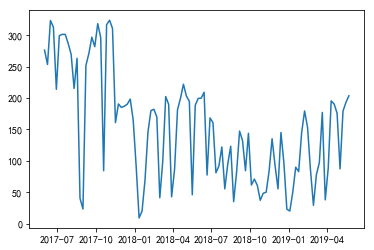

In [17]:
register_matplotlib_converters()
plt.plot(ts)

### 平稳性检验函数

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #移动平均和移动方差
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #把移动平均和移动方差画出来:
    orig = plt.plot(timeseries, color='blue',label='原始曲线')
    mean = plt.plot(rolmean, color='yellow', label='移动平均')
    std = plt.plot(rolstd, color='black', label = '移动方差')
    plt.legend(loc='best')
    plt.title(u'绘制移动平均数和移动方差，观察它是否随着时间变化')
    plt.show(block=False)
    
    #进行单位根检验:
    print('单位根检验:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput.loc['p-value']>0.05:
        print('p值大于0.05，不能拒绝原假设，说明时间序列是非平稳的')
    else:
        print('p值小于0.05，拒绝原假设，说明时间序列是平稳的')
    '''
    单位根的原假设为序列具有单位根，即非平稳，
    对于一个平稳的时序数据，就需要在给定的置信水平上显著，拒绝原假设。
    '''

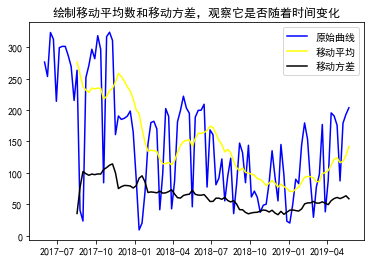

单位根检验:
Test Statistic                 -2.309983
p-value                         0.168769
#Lags Used                      6.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64
p值大于0.05，不能拒绝原假设，说明时间序列是非平稳的


In [19]:
test_stationarity(ts)

# 平稳性的处理


## 预测和消除趋势


float64


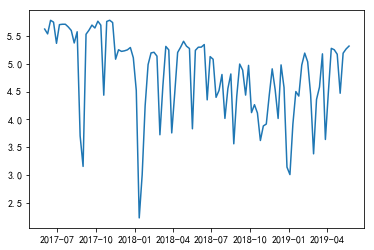

In [20]:
print(ts.dtypes)
ts_log = np.log(ts)
plt.plot(ts_log,label='经过对数变换后的曲线')

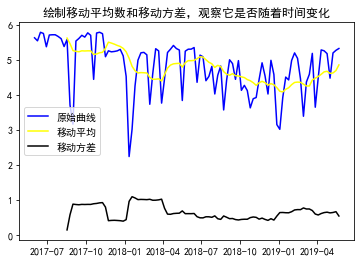

单位根检验:
Test Statistic                  -5.547995
p-value                          0.000002
#Lags Used                       0.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
p值小于0.05，拒绝原假设，说明时间序列是平稳的


In [21]:
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

## Smoothing:

### 移动平均

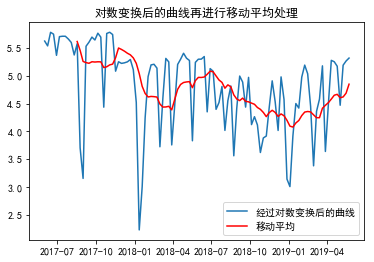

In [22]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log,label='经过对数变换后的曲线')
plt.plot(moving_avg, color='red',label='移动平均')
plt.title('对数变换后的曲线再进行移动平均处理')
plt.legend(loc='best')
plt.show()

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

time_series
2017-06-01         NaN
2017-06-08         NaN
2017-06-15         NaN
2017-06-22         NaN
2017-06-29         NaN
2017-07-06         NaN
2017-07-13         NaN
2017-07-20         NaN
2017-07-27         NaN
2017-08-03         NaN
2017-08-10         NaN
2017-08-17   -0.040311
Name: 3002172590, dtype: float64

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

time_series
2017-08-17   -0.040311
2017-08-24   -1.750028
2017-08-31   -2.100584
2017-09-07    0.293841
2017-09-14    0.379138
Name: 3002172590, dtype: float64

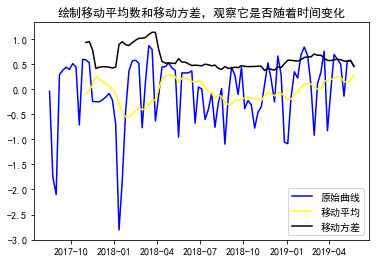

单位根检验:
Test Statistic                -6.644066e+00
p-value                        5.320055e-09
#Lags Used                     1.000000e+00
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64
p值小于0.05，拒绝原假设，说明时间序列是平稳的


In [25]:
test_stationarity(ts_log_moving_avg_diff)

### 指数平滑法

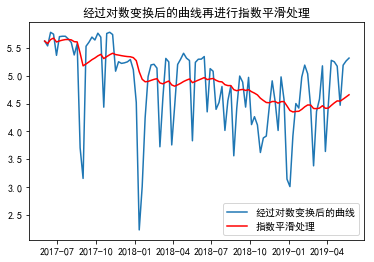

In [26]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log,label='经过对数变换后的曲线')
plt.plot(expwighted_avg, color='red',label='指数平滑处理')
plt.title('经过对数变换后的曲线再进行指数平滑处理')
plt.legend(loc='best')
plt.show()
# expwighted_avg.plot(style='k--')

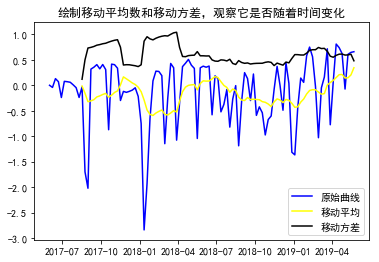

单位根检验:
Test Statistic                -6.453636e+00
p-value                        1.502041e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64
p值小于0.05，拒绝原假设，说明时间序列是平稳的


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## 消除趋势和季节性

### 差分:

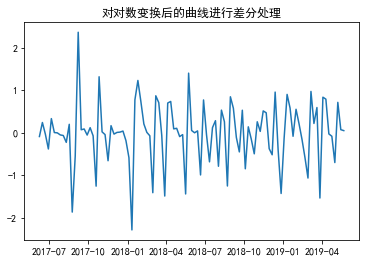

In [28]:
#取一阶差分:
ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)
plt.title('对对数变换后的曲线进行差分处理')
plt.show()

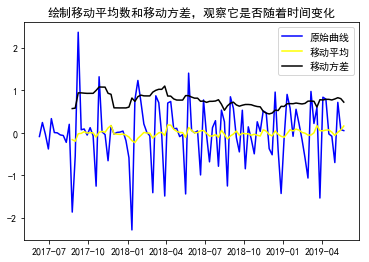

单位根检验:
Test Statistic                 -5.341969
p-value                         0.000004
#Lags Used                      9.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64
p值小于0.05，拒绝原假设，说明时间序列是平稳的


In [29]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

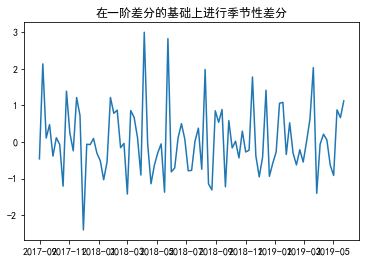

In [30]:
#在一阶差分的基础上进行季节性差分:
ts_log_sea_first_diff = ts_log_diff - ts_log_diff.shift(12)
plt.plot(ts_log_sea_first_diff)
plt.title('在一阶差分的基础上进行季节性差分')
plt.show()

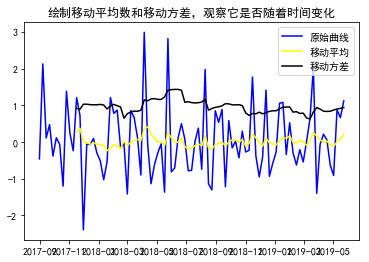

单位根检验:
Test Statistic                 -3.366620
p-value                         0.012151
#Lags Used                     11.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64
p值小于0.05，拒绝原假设，说明时间序列是平稳的


In [31]:
ts_log_sea_first_diff.dropna(inplace=True)
test_stationarity(ts_log_sea_first_diff)

### 时间序列的分解:

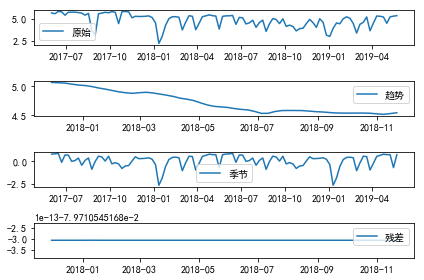

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='原始')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='趋势')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='季节')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='残差')
plt.legend(loc='best')
plt.tight_layout()

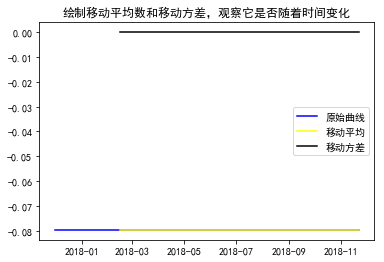

单位根检验:
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64
p值大于0.05，不能拒绝原假设，说明时间序列是非平稳的


In [33]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# 预测时间序列

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

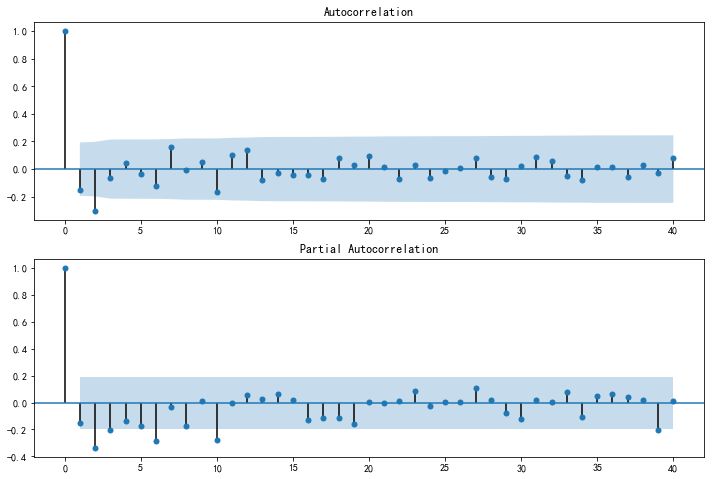

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=40, ax=ax2)

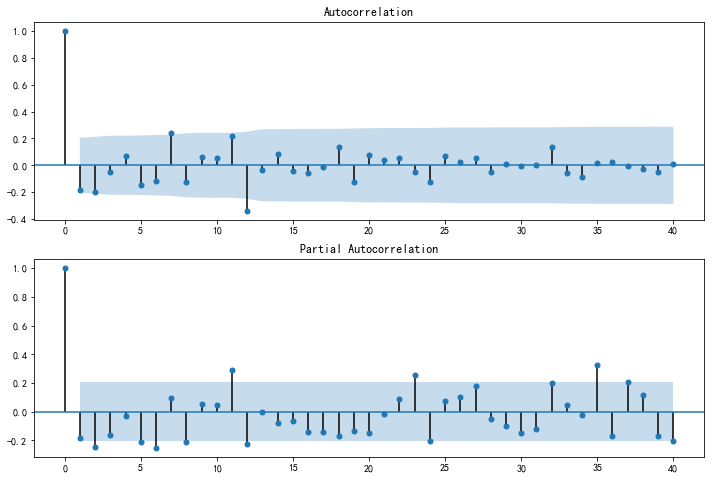

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_sea_first_diff, lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_sea_first_diff, lags=40, ax=ax2)

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


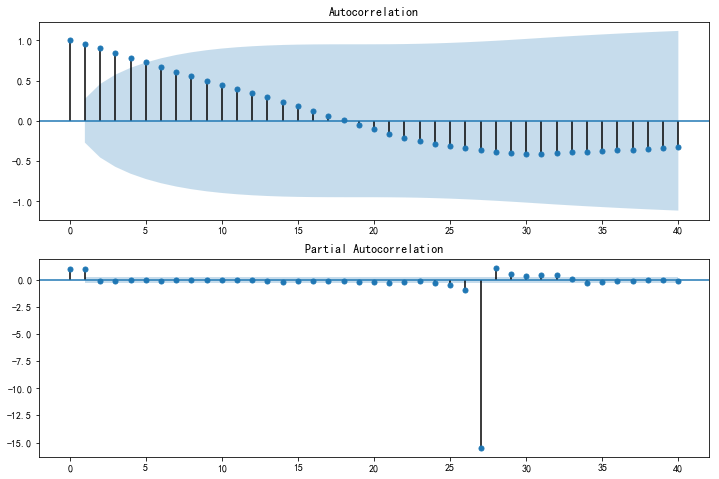

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend.dropna(), lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend.dropna(), lags=40, ax=ax2)

### ACF & PACF Plots

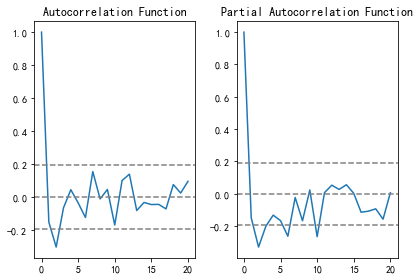

In [38]:
#选择差分处理后的结果进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

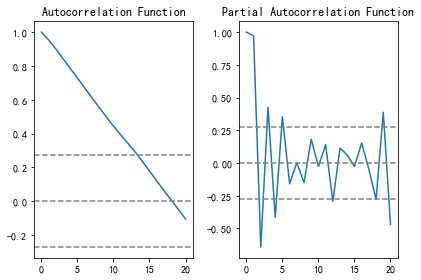

In [39]:
#选择差分处理后的结果进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(trend.dropna(), nlags=20)
lag_pacf = pacf(trend.dropna(), nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

### AR Model:

In [40]:
ts_log=ts_log.rename('3002172591')
ts_log.head()

time_series
2017-06-01    5.621487
2017-06-08    5.534969
2017-06-15    5.778735
2017-06-22    5.745564
2017-06-29    5.365275
Name: 3002172591, dtype: float64

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 46.3373')

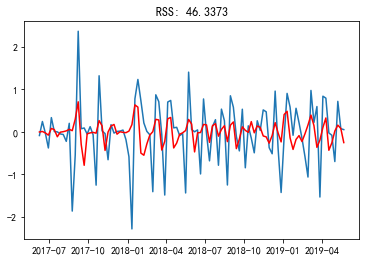

In [41]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [42]:
#MA model:
trend=trend.rename('3002172591')
trend=trend.dropna()
model = ARIMA(trend, order=(12, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-trend)**2))

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

### MA Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)
predictions_ARIMA_log=predictions_ARIMA_log.rename('predictions_ARIMA_log')
predictions_ARIMA_log.to_csv(predictions_ARIMA_log.name+'.csv')

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### 对分解出来的趋势进行预测

In [ ]:
def trend_model(self, order):
    self.trend.dropna(inplace=True)
    train = self.trend[:len(self.trend)-self.test_size]
    #arima的训练参数order =（p,d,q），具体意义查看官方文档，调参过程略。
    self.trend_model = ARIMA(train, order).fit(disp=-1, method='css')
    d = self.residual.describe()
    delta = d['75%'] - d['25%']
    self.low_error, self.high_error = (d['25%'] - 1 * delta, d['75%'] + 1 * delta)

In [ ]:
def predict_new(self):
    '''
    预测新数据
    '''
    #续接train，生成长度为n的时间索引，赋给预测序列
    n = self.test_size
    self.pred_time_index= pd.date_range(start=self.train.index[-1], periods=n+1, freq='1min')[1:]
    self.trend_pred= self.trend_model.forecast(n)[0]
    self.add_season()


def add_season(self):
    '''
    为预测出的趋势数据添加周期数据和残差数据
    '''
    self.train_season = self.seasonal[:self.train_size]
    values = []
    low_conf_values = []
    high_conf_values = []

    for i, t in enumerate(self.pred_time_index):
        trend_part = self.trend_pred[i]

        # 相同时间点的周期数据均值
        season_part = self.train_season[self.train_season.index.time == t.time()].mean()

        # 趋势 + 周期 + 误差界限
        predict = trend_part + season_part
        low_bound = trend_part + season_part + self.low_error
        high_bound = trend_part + season_part + self.high_error

        values.append(predict)
        low_conf_values.append(low_bound)
        high_conf_values.append(high_bound)

    # 得到预测值，误差上界和下界
    self.final_pred = pd.Series(values, index=self.pred_time_index, name='predict')
    self.low_conf = pd.Series(low_conf_values, index=self.pred_time_index, name='low_conf')
    self.high_conf = pd.Series(high_conf_values, index=self.pred_time_index, name='high_conf')


In [ ]:
md = ModelDecomp(file=filename, test_size=1440)
md.decomp(freq=1440)
md.trend_model(order=(1, 1, 3)) # arima模型的参数order
md.predict_new() 
pred = md.final_pred
test = md.test

plt.subplot(211)
plt.plot(md.ts) # 平滑过的训练数据加未做处理的测试数据
plt.title(filename.split('.')[0])

plt.subplot(212)
pred.plot(color='blue', label='Predict') # 预测值
test.plot(color='red', label='Original') # 真实值
md.low_conf.plot(color='grey', label='low') # 低置信区间
md.high_conf.plot(color='grey', label='high') # 高置信区间

plt.legend(loc='best')
plt.title('RMSE: %.4f' % np.sqrt(sum((pred.values - test.values) ** 2) / test.size))
plt.tight_layout()
plt.show()